In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from simulation import gen_simulated_data
from PPCA import ProjectedPCA

# PPCA on simulated data

In [2]:
# characteristic functions

def g1(x):
    return x

def g2(x):
     return np.power(x,2) - 1

def g3(x):
    return np.power(x,3) - 2*x

def g4(x):
    return np.power(x,4) - 3*np.power(x,2)

def g_mix(x):
    return np.sinc(3*x)

In [3]:
# data simulation

T = 10
p = 100

# choice of functions ~ matrix dimensions are (K x d) 
functions = [[g1],
             [g2],
             [g3]]

# functions = [[g1, g2, g3]]

# functions = [[g3, g2],
#              [g1, g4]]

# functions = [[g_mix]]

X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions, iterations = True, identify = True)

Gx_identify:
 [[3.49111291e+02 3.75632886e-14 9.06774768e-14]
 [3.75632886e-14 1.53374114e+02 8.31394952e-15]
 [9.06774768e-14 8.31394952e-15 8.09895583e+01]]
iterations = 1
F_identify:
 [[ 1.00000000e+00 -8.49079476e-16  9.68139023e-17]
 [-8.49079476e-16  1.00000000e+00  9.88866621e-16]
 [ 9.68139023e-17  9.88866621e-16  1.00000000e+00]]


In [4]:
# x_plot = np.linspace(0, 1, 100)
# plt.plot(x_plot, g_mix(x_plot))

# Xf = X.flatten()
# plt.scatter(np.arange(0, len(Xf)), Xf)
# plt.hlines(Xf.std()*2 + Xf.mean(), 0,  len(Xf), linestyles='dashed')
# plt.hlines(-Xf.std()*2 + Xf.mean(), 0, len(Xf), linestyles='dashed')

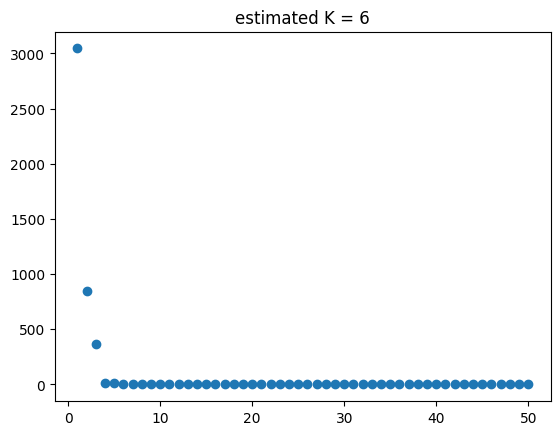

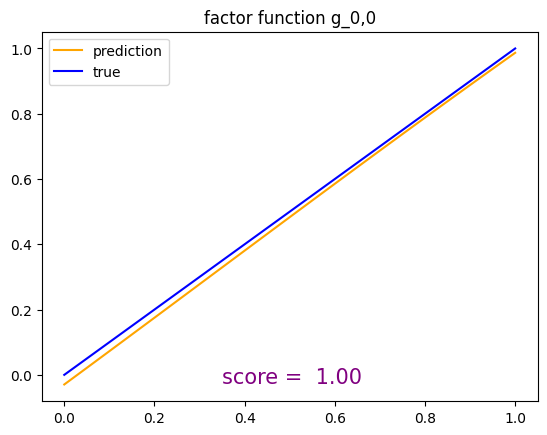

Estimated K: 6
F error: 0.17047930104896114
Lambda error: 0.7412543428256858
Gamma error: 0.7373706815001421
Gx error: 0.0757791450178899
Y error: 447.99246813138495
det: 61.257452646467094


In [19]:
# PPCA applied to data simulation

# 'spl' or 'pol' (spline or polynomial)
# 'trad' (P = identity, pca tradi)

ppca = ProjectedPCA('spl', K = 3, J = 6).fit(X,Y,H1)
# ppca = ProjectedPCA('fourier', K = 'default', J = 5, build = 'constant').fit(X,Y)
# ppca = ProjectedPCA('fourier', K = 'default', J = 'default', build = 'constant').fit(X,Y)
# ppca = ProjectedPCA('trad', K = 'default').fit(X,Y)

ppca.plot_K()
if ppca.b_class != 'trad':
    k, l = 0, 0
    ppca.plot_factor(k,l, f_compare = functions[k][l], score = True)
    plt.show()

# ppca.plot_Y(0)

print("Estimated K:", ppca.K_hat)
print("F error:", np.linalg.norm(F - ppca.F_hat)/np.sqrt(T))
print("Lambda error:", np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p))
print("Gamma error:", np.linalg.norm(Gamma - ppca.Gamma_hat)/np.sqrt(p))
print("Gx error:", np.linalg.norm((Lambda - Gamma) - ppca.Gx_hat)/np.sqrt(p))
print("Y error:", np.linalg.norm(Y-ppca.Y_hat))


# DEBUG
if ppca.b_class != 'trad':
    print("det:", np.linalg.det(ppca.PHI.T @ ppca.PHI))
    # print("B max:", ppca.B_hat.max())
    # PHI = pd.DataFrame(ppca.PHI)
    # ptp = pd.DataFrame(ppca.PHI.T @ ppca.PHI)
    # print("Y error rebuild:", np.linalg.norm(Y-ppca.PHI @ ppca.B_hat @ ppca.F_hat.T))
    # display(PHI)
    # ptp

In [6]:
# np.set_printoptions(suppress=True)
# print("F = ", F[:5, 0])
# print("F_hat =", ppca.F_hat[:5, 0])

# display(F)
# display(ppca.F_hat)

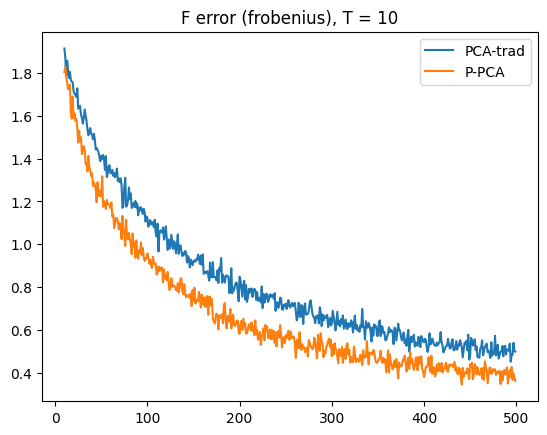

In [7]:
# plot F error (T = 10)

J = 6
T = 10
mean_cnt = 500
interval_p = np.arange(10, 500, 1)
plt.title(f"F error (frobenius), T = {T}")


F_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('trad', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(F - ppca.F_hat)/np.sqrt(T)
    F_error = np.append(F_error, new_error.mean())
    
plt.plot(interval_p, F_error, label = 'PCA-trad')

F_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('spl', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(F - ppca.F_hat)/np.sqrt(T)
    F_error = np.append(F_error, new_error.mean())

plt.plot(interval_p, F_error, label = 'P-PCA')
plt.legend()
plt.show()

/home/czar/code/psc/PPCA.py:215: RuntimeWarning: divide by zero encountered in double_scalars
  K_hat = 1 + np.argmax([values[i]/values[i+1] for i in range(len(values)-1)])


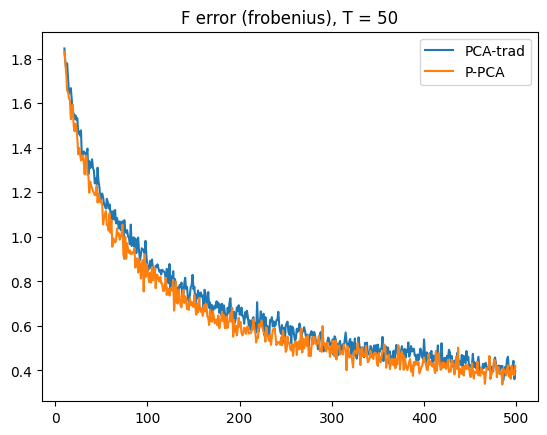

In [8]:
# plot F error (T = 50) 

J = 6
T = 50
mean_cnt = 500
interval_p = np.arange(10, 500, 1)
plt.title(f"F error (frobenius), T = {T}")

F_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('trad', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(F - ppca.F_hat)/np.sqrt(T)
    F_error = np.append(F_error, new_error.mean())
    
plt.plot(interval_p, F_error, label = 'PCA-trad')

F_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('spl', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(F - ppca.F_hat)/np.sqrt(T)
    F_error = np.append(F_error, new_error.mean())

plt.plot(interval_p, F_error, label = 'P-PCA')
plt.legend()
plt.show()

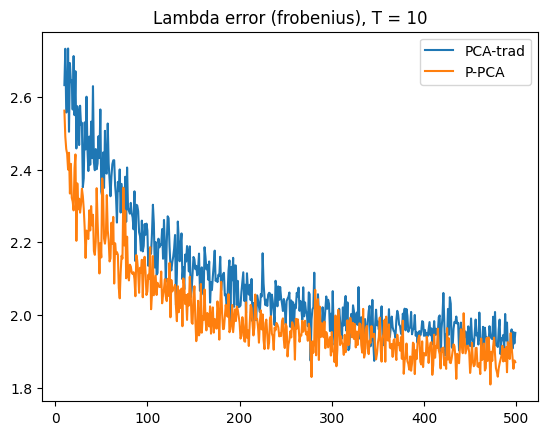

In [9]:
# plot Lambda error (T = 10) 

J = 6
T = 10
mean_cnt = 500
interval_p = np.arange(10, 500, 1)
plt.title(f"Lambda error (frobenius), T = {T}")

Lambda_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('trad', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p)
    Lambda_error = np.append(Lambda_error, new_error.mean())
    
plt.plot(interval_p, Lambda_error, label = 'PCA-trad')

Lambda_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('spl', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p)
    Lambda_error = np.append(Lambda_error, new_error.mean())

plt.plot(interval_p, Lambda_error, label = 'P-PCA')
plt.legend()
plt.show()

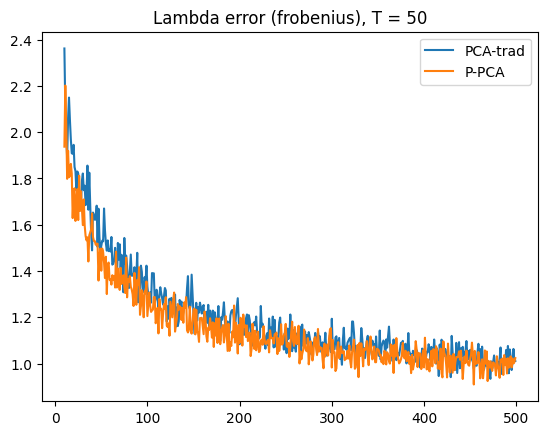

In [10]:
# plot Lambda error (T = 50)

J = 6
T = 50
mean_cnt = 500
interval_p = np.arange(10, 500, 1)
plt.title(f"Lambda error (frobenius), T = {T}")

Lambda_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('trad', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p)
    Lambda_error = np.append(Lambda_error, new_error.mean())
    
plt.plot(interval_p, Lambda_error, label = 'PCA-trad')

Lambda_error = np.empty(0)
for p in interval_p:
    new_error = np.empty(mean_cnt)
    for i in range(mean_cnt):
        X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p, T, functions)
        ppca = ProjectedPCA('spl', K = len(functions), J = J).fit(X,Y,H1)
        new_error[i] = np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p)
    Lambda_error = np.append(Lambda_error, new_error.mean())

plt.plot(interval_p, Lambda_error, label = 'P-PCA')
plt.legend()
plt.show()

# PPCA on real data

In [11]:
# # Extract data

# def get_data(start_date: int = 0, final_date: int = 24, shape: str = '') -> tuple[pd.DataFrame, pd.DataFrame] :
    
#     # info
#     info = pd.read_csv('./data/info_charact.csv', index_col = 0)
#     char_names = info.iloc[:, 0]
#     file_names = np.array([str(x) + '.csv' for x in info.index.values])
#     d = len(info)-1
    
#     parse = lambda  x : pd.read_csv(f'./data/{x}', index_col = 0, parse_dates = True)
    
#     # filter NaN values 
#     data_list = [parse(file).iloc[start_date:final_date+1, :] for file in file_names if file != '44.csv']
#     asset_names = list(set.intersection(*[set(df.dropna(axis=1).columns.values) for df in data_list]))
    
#     # get features 
#     X_train = pd.DataFrame(data=[df[asset_names].iloc[:-1,:].mean() for df in data_list], index=list(char_names[:-1])).T
#     X_test = pd.DataFrame(data=[df[asset_names].iloc[1:,:].mean() for df in data_list], index=list(char_names[:-1])).T
    
#     # get returns [range]
#     Y = parse('44.csv')[asset_names].T
#     Y_train, Y_test = Y.iloc[:, start_date:final_date], Y.iloc[:, start_date+1:final_date+1]
    
#     # choice of shapes'
#     # normalize (column ~ [0 mean, 1 std])
#     if shape == 'norm':
#         norm  = lambda x : (x-x.mean())/x.std()
#         X_train, X_test = norm(X_train), norm(X_test)
#         Y_train, Y_test = norm(Y_train), norm(Y_test)

#     # scale (column ~ [0,1] range)
#     elif shape == 'minmax':
#         scale = lambda x : (x-x.min())/(x.max()-x.min())
#         X_train, X_test = scale(X_train), scale(X_test)
#         Y_train, Y_test = scale(Y_train), scale(Y_test)
     
    
#     return X_train, X_test, Y_train, Y_test
 
# X_train, X_test, Y_train, Y_test = get_data(0,24, 'norm')
# display(X_train.head())
# display(Y_train.head())
# display(Y_test.iloc[:,-1].to_frame().head())

In [12]:
# ppca = ProjectedPCA('spl', K = T//2, J = 'default').fit(X_train.to_numpy(), Y_train.to_numpy())

# ppca.plot_K()
# ppca.plot_factor(0,0)
# ppca.plot_Y(0)

In [13]:
# # F adjacent distances and estimated K

# T = 20
# K = T
# norma = 'fro'
# # norma = np.inf
# F_prev = None
# F_errors = []
# K_estimated = []
# for ti in range(100):
#     tf = ti + T
#     X_train, X_test, Y_train, Y_test = get_data(ti, tf, 'norm')
#     ppca = ProjectedPCA('spl', K = K, J = 'default').fit(X_train.to_numpy(), Y_train.to_numpy())
#     if ti: F_errors.append(np.linalg.norm(F_prev - ppca.F_hat, ord = norma))
#     F_prev = ppca.F_hat
#     K_estimated.append(ppca.K_hat)

# F_errors = np.asarray(F_errors)
# plt.figure(figsize=(12,5))
# plt.title("dF frobenius norm")
# # plt.title("dF maximal norm")
# plt.plot(np.arange(len(F_errors)), F_errors) 
# plt.show()

# plt.figure(figsize=(12,5))
# plt.title("estimated K")
# plt.scatter(np.arange(len(K_estimated)), K_estimated)
# plt.show()

In [14]:
# # F compared to the mean F matrix

# T = 20
# K = T
# norma = 'fro'
# # norma = np.inf
# F_errors = []
# for ti in range(100):
#     tf = ti + T
#     X_train, X_test, Y_train, Y_test = get_data(ti, tf, 'norm')
#     ppca = ProjectedPCA('spl', K = K, J = 'default').fit(X_train.to_numpy(), Y_train.to_numpy())
#     F_errors.append(ppca.F_hat)

# F_errors = np.asarray(F_errors)
# F_mean = F_errors.mean(axis=0)
# F_errors = np.asarray([np.linalg.norm(F-F_mean, ord = norma) for F in F_errors])

# plt.figure(figsize=(12,5))
# plt.title("F - F_mean frobenius norm")
# plt.plot(np.arange(len(F_errors)), F_errors)


In [15]:
# stock = 0
# ti = 0
# T = 20
# K = T

# X_train, X_test, Y_train, Y_test = get_data(ti, ti+T, 'norm')

# ppca = ProjectedPCA('spl', K = K, J = 'default').fit(X_train.to_numpy(), Y_train.to_numpy())
# Y_old = ppca.Y_hat
# print(Y_old)
# ppca_new = ProjectedPCA('spl', K = K, J = 'default').fit(X_test.to_numpy(), Y_test.to_numpy())

# Y_new = (ppca_new.PHI @ ppca.B_hat + ppca.Gamma_hat) @ ppca.F_hat.T


# plt.title(f"prediction test \'{stock}\'")
# # plt.plot(np.arange(len(Y_old[stock])), Y_old[stock], label = 'estimation')
# plt.plot(np.arange(1, len(Y_old[stock])+1), Y_new[stock], label = 'true')
# plt.legend()
# plt.show()

# ppca.B_hat.max()
